x_train -> input<br>
y_train -> output <br><br>
둘이 동일<br>
그래서..
<br>
## H(x) = Wx = x 가 정확한 모델
-> train x가 input = output

## W=1(epoch 늘어날수록), cost=0<br>
## 1에서 멀어질수록 cost 높아짐

# cost function(w에 대한 2차함수) 최소화?
- 기울기가 음수(negative slope)일때는, w(params) 크게 +(right)
- 기울기가 양수(positive slope)일때는, w(params) 작게 -(left)
- 기울기가 가파를수록 cost가 커지니 w도 크게 바꿈
- 기울기가 평평할수록(저점) cost가 0에 가까우니 w 조금 바꿈
- 
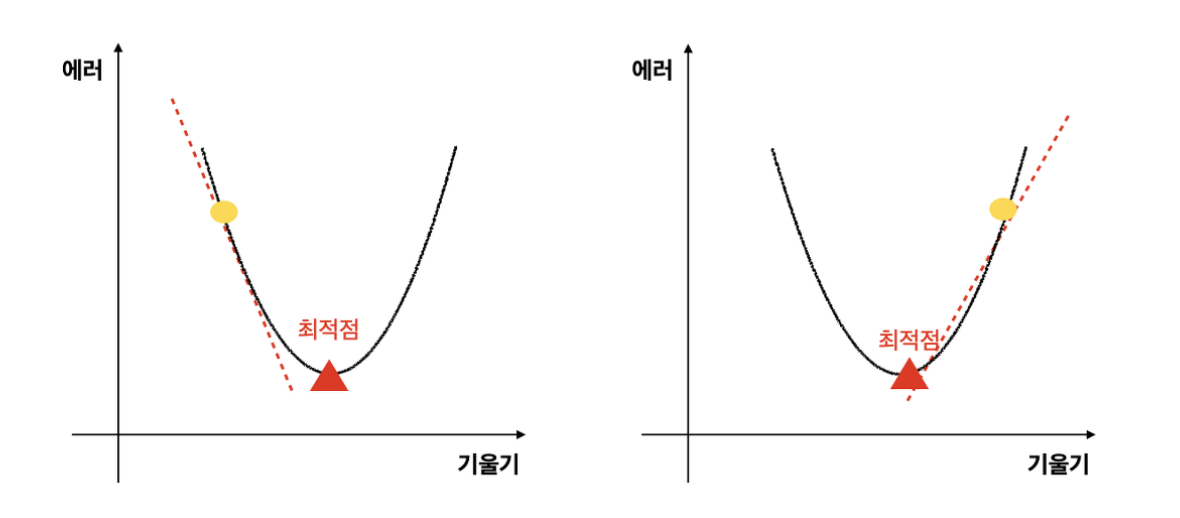  

## gradient -> 전체의 평균(torch.mean으로 구함) gradient에서 w 업데이트
## weight - a*기울기(loss fun 미분값)
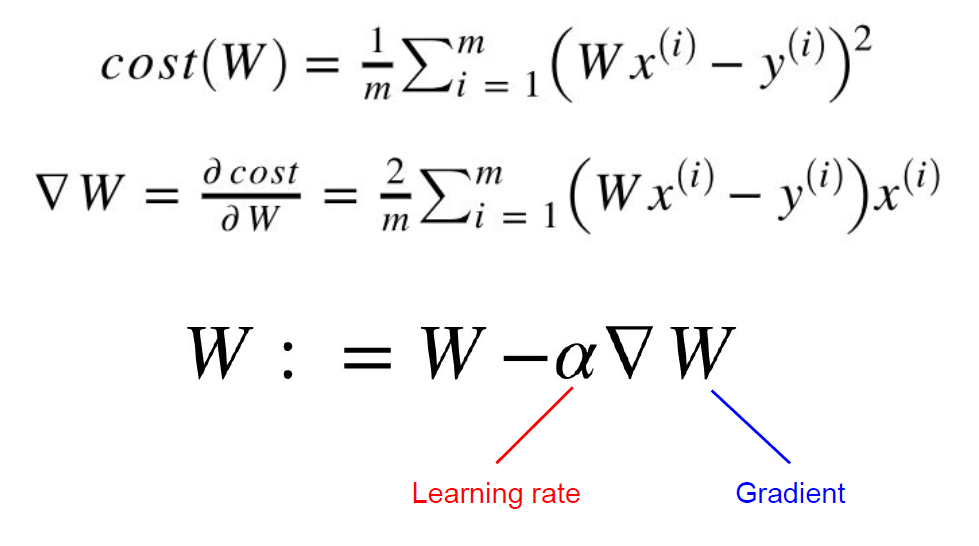

# torch.optim 모듈 : 다양한 최적화 알고리즘 지원
torch.optim -> gradient descent<br>
optimizer 정의 : 변수들과 lr 정의

- Stochastic Gradient Descent (SGD): 가장 기본적인 최적화 알고리즘으로, 각각의 파라미터에 대해 학습률(learning rate)을 곱한 값을 사용하여 가중치를 업데이트하는 방식입니다.
  - Adam (Adaptive Moment Estimation): 학습률을 각 파라미터마다 적응적으로 조절하는 최적화 알고리즘으로, 현재 그래디언트와 이전 그래디언트의 지수 가중 평균을 이용하여 가중치를 업데이트합니다.
  
- RMSprop (Root Mean Square Propagation): 그래디언트의 제곱값의 이동 평균을 이용하여 학습률을 조절하는 최적화 알고리즘으로, Adam과 유사한 방식으로 학습률을 조절합니다.
  
- 
Adagrad (Adaptive Gradient Descent): 각 파라미터에 대한 학습률을 조절하는 방식으로 모델을 업데이트합니다. 이전 그래디언트의 제곱의 누적 값을 사용하여 학습률을 조절합니다. torch.optim.Adagrad로 사용할 수 습니다.
   
-
AdamW (Adam with Weight Decay): Adam 옵티마이저에 가중치 감쇠(L2 정규화)를 추가한 버전으로, 가중치 감쇠를 통해 모델을 규제하는 효과를 얻을있습니다 있습니다. 수<b

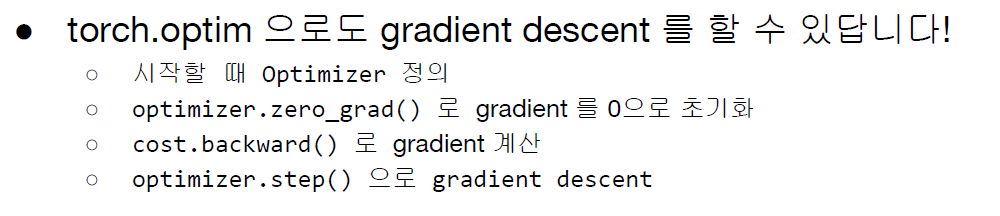
<br>
r>
## 1. 모델 정의모의
## 2. 최적화 알고리즘 선택 및 하이퍼파라미터 
## 3. 가중치 업데이트

# 한번만 정의
## 1. data definition
## 2. hypothesis initalization
## 3. optimizer definition

In [ ]:
# data definition
x_train = torch.FloatTensor([[1], [2], [3]])  # input
y_train = torch.FloatTensor([[1], [2], [3]])  # output

# hypothesis initialization (without bias)
W = torch.zeros(1, requires_grad=True)  # requires_grad=True : 학습을 할 것이라고 명시
#b = torch.zeros(1, requires_grad=True)

# optimizer definition
optimizer = optim.SGD([W], lr=0.15)
#optimizer = optim.SGD([W, b], lr=0.01)

# 반복
## 1. H(x) 계산(prediciton of hypothesis)
## 2. cost 계산
## 3. 학습 w/ optmizer

In [ ]:
nb_epochs = 10
for epoch in range(nb_epochs + 1):
# H(x) 계산(hypothesis 예측)
hypothesis = x_train * W
#hypothesis = x_train * W + b

# cost 계산(mse)
cost = torch.mean((hypothesis - y_train) ** 2)  
print('Epoch {:4d}/{} W: {:.3f} Cost: {:.6f}'.format(
epoch, nb_epochs, W.item(), cost.item()
))

# cost로 H(x) 개선(optimizer로 학습)
optimizer.zero_grad()
cost.backward()
optimizer.step()

#gradient = 2 * torch.mean((W * x_train - y_train) * x_train)
#lr = 0.1
#W -= lr * gradient